# Descripción
   ### Los datos están relacionados con campañas de marketing directo de una institución bancaria. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito a plazo bancario) estaría ('sí') o no ('no') suscrito.


    Reglas y método de evaluación
    
    El desafío consistirá en que cada grupo formado deberá entregar un arreglo con los resultados ('yes' o 'no') y se medirá la medida de desempeño F1 score (macro).
    
    EL archivo de entrega debe ser en formato csv sin indice. Debe ser una sola columna con valores ´yes´ o ´no´ en 5210 filas


#### Variables de entrada:

# datos del cliente bancario:
1 - edad (numérico)

2 - trabajo: tipo de trabajo (categórico: 'admin.', 'Obrero', 'emprendedor', 'empleada doméstica', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')

3 - marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)

4 - educación (categórica: 'básico.4y', 'básico.6y', 'básico.9y', 'escuela secundaria', 'analfabeto', 'curso.profesional', 'título universitario', 'desconocido')

5 - incumplimiento: ¿tiene crédito en incumplimiento? (categórico: 'no', 'sí', 'desconocido')

6 - vivienda: ¿tiene préstamo para vivienda? (categórico: 'no', 'sí', 'desconocido')

7 - préstamo: ¿tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')

# relacionado con el último contacto de la campaña actual:

8 - contacto: tipo de comunicación de contacto (categórico: 'celular', 'teléfono')

9 - mes: último mes de contacto del año (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de contacto de la semana (categórico: 'lun', 'tue', 'mié', 'jue', 'vie')

11 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duración = 0, entonces y = 'no'). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después de la finalización de la llamada y, obviamente, se conoce. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

# otros atributos:

12 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)

13 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)

14 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

15 - poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')

Variable de salida (objetivo deseado):

21 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')


# Comenzando

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from imblearn.over_sampling import RandomOverSampler
import imblearn

In [2]:
df_train = pd.read_csv('Trainset.csv', index_col= 'Unnamed: 0')
df_test = pd.read_csv('TestFeatures.csv')
final = pd.read_csv('submission_example.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,190,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,140,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,249,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,246,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,253,1,-1,0,unknown,no


## Eliminar Columnas
duration   



In [5]:
df_train = df_train.drop(['duration'], axis=1)
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,1,-1,0,unknown,no


## Distribution

In [6]:
df_train['job'].unique()

array(['management', 'admin.', 'blue-collar', 'technician',
       'self-employed', 'housemaid', 'services', 'unemployed', 'retired',
       'student', 'entrepreneur', 'unknown'], dtype=object)

### Mayormente los usuarios NO tiene contratado el producto

In [7]:
df_train.y.value_counts()

no     35347
yes     4653
Name: y, dtype: int64

In [8]:
df_train.y.value_counts()/df_train.shape[0]

no     0.883675
yes    0.116325
Name: y, dtype: float64

# Preproceso de datos Ecoding Test Train

### Copias de los datos.

In [9]:
# Datos sin balanceo
df_prep = df_train.copy()
df_train_oh = df_train.copy()

# Encoding de datos Train

## Evaluemos otro preproceso
## encoding onehot + minmax

In [10]:
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "admin."),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "management"),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "services"),"education"] = "tertiary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "technician."),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "retired"),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "blue-collar"),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "housemaid."),"education"] = "primary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "self-employed"),"education"] = "tertiary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "student"),"education"] = "secondary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "entrepreneur"),"education"] = "tertiary"
df_train_oh.loc[(df_train_oh.education == "unknown") & (df_train_oh.job == "unemployed"),"education"] = "secondary"
#REST CAN BE SECONDARY
df_train_oh.loc[(df_train_oh.education == "unknown"),"education"] = "secondary"

In [11]:
df_train_oh["contact"].replace(["unknown"],df_train_oh["contact"].mode(),inplace = True)

In [12]:
df_train_oh.drop(columns = ["day","month"],inplace = True)

In [13]:
# One hot encode the categorical variables
lst = ['job','marital']
remove = list()
for i in lst:
    if (df_train_oh[i].dtype == np.str or df_train_oh[i].dtype == np.object):
        for j in df_train_oh[i].unique():
            df_train_oh[i+'_'+j] = np.where(df_train_oh[i] == j,1,0)
        remove.append(i)
df_train_oh = df_train_oh.drop(remove, axis=1)
df_train_oh.head()

,age,education,default,balance,housing,loan,contact,campaign,pdays,previous,...,job_housemaid,job_services,job_unemployed,job_retired,job_student,job_entrepreneur,job_unknown,marital_single,marital_married,marital_divorced
0,46,tertiary,no,593,yes,no,cellular,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,42,tertiary,no,1536,no,no,cellular,1,182,4,...,0,0,0,0,0,0,0,0,1,0
2,33,secondary,no,370,yes,no,cellular,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
3,29,secondary,no,1472,no,no,cellular,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
4,29,secondary,no,767,yes,no,cellular,1,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df_train_oh.loc[(df_train_oh.education == "tertiary"),"education"] = 2
df_train_oh.loc[(df_train_oh.education == "secondary") ,"education"] = 1
df_train_oh.loc[(df_train_oh.education == "primary"),"education"] = 0
#Default Column
df_train_oh.loc[(df_train_oh.default == "yes"),"default"] = 1
df_train_oh.loc[(df_train_oh.default == "no") ,"default"] = 0

In [16]:
df_train_oh.loc[(df_train_oh.balance > 66721),"balance"] = 66721
#Lets scale balance column.
df_train_oh["balance"]= df_train_oh["balance"] / 66721

In [17]:
df_train_oh.loc[(df_train_oh.housing == "yes"),"housing"] = 1 # housing column label encoding
df_train_oh.loc[(df_train_oh.housing == "no") ,"housing"] = 0

#Loan column label encoding
df_train_oh.loc[(df_train_oh.loan == "yes"),"loan"] = 1
df_train_oh.loc[(df_train_oh.loan == "no") ,"loan"] = 0

#contact column label encoding
df_train_oh.loc[(df_train_oh.contact == "telephone"),"contact"] = 1 # 0 means cellular 1 means telephone
df_train_oh.loc[(df_train_oh.contact == "cellular") ,"contact"] = 0

In [18]:
df_train_oh.loc[(df_train_oh.pdays == -1),"pdays"] = 999

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
df_train_oh = pd.concat((df_train_oh , pd.DataFrame(ohe.fit_transform(df_train_oh["poutcome"].to_frame()),columns = "poutcome_" + np.sort(df_train_oh["poutcome"].unique()))),axis = 1)
df_train_oh.drop(columns = ["poutcome"],inplace = True)

df_train_oh.loc[(df_train_oh.y == "yes"),"y"] = 1 # 0 means subscribed no 1 means yes
df_train_oh.loc[(df_train_oh.y == "no") ,"y"] = 0

In [21]:
df_train_oh.education = df_train_oh.education.astype(int)
df_train_oh.default = df_train_oh.default.astype(int)
df_train_oh.housing = df_train_oh.housing.astype(int)
df_train_oh.loan = df_train_oh.loan.astype(int)
df_train_oh.contact = df_train_oh.contact.astype(int)
df_train_oh.y = df_train_oh.y.astype(int)

# Preproceso datos TEST

## encoding datos sin balanceo

#### Esto es necesario para poder probar el modelo sobre la misma estructura de datos pre_procesados de train.

In [28]:
test_trans = df_test.copy()
test_trans.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,admin.,single,tertiary,no,394,no,no,telephone,28,jan,968,2,-1,0,unknown
1,56,retired,married,secondary,no,334,no,no,cellular,21,jul,101,1,-1,0,unknown
2,50,entrepreneur,married,tertiary,no,52,no,no,cellular,31,jul,22,8,-1,0,unknown
3,54,entrepreneur,married,secondary,no,653,yes,no,unknown,15,may,352,1,-1,0,unknown
4,47,management,married,tertiary,no,0,no,no,cellular,19,aug,213,2,-1,0,unknown


In [29]:
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "admin."),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "management"),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "services"),"education"] = "tertiary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "technician."),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "retired"),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "blue-collar"),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "housemaid."),"education"] = "primary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "self-employed"),"education"] = "tertiary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "student"),"education"] = "secondary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "entrepreneur"),"education"] = "tertiary"
test_trans.loc[(test_trans.education == "unknown") & (test_trans.job == "unemployed"),"education"] = "secondary"
#REST CAN BE SECONDARY
test_trans.loc[(test_trans.education == "unknown"),"education"] = "secondary"

In [30]:
test_trans["contact"].replace(["unknown"],test_trans["contact"].mode(),inplace = True)

In [31]:
test_trans.drop(columns = ["day","month"],inplace = True)

In [32]:
# One hot encode the categorical variables
lst = ['job','marital']
remove = list()
for i in lst:
    if (test_trans[i].dtype == np.str or test_trans[i].dtype == np.object):
        for j in test_trans[i].unique():
            test_trans[i+'_'+j] = np.where(test_trans[i] == j,1,0)
        remove.append(i)
test_trans = test_trans.drop(remove, axis=1)
test_trans.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_self-employed,job_blue-collar,job_services,job_unemployed,job_unknown,job_student,job_housemaid,marital_single,marital_married,marital_divorced
0,51,tertiary,no,394,no,no,telephone,968,2,-1,...,0,0,0,0,0,0,0,1,0,0
1,56,secondary,no,334,no,no,cellular,101,1,-1,...,0,0,0,0,0,0,0,0,1,0
2,50,tertiary,no,52,no,no,cellular,22,8,-1,...,0,0,0,0,0,0,0,0,1,0
3,54,secondary,no,653,yes,no,cellular,352,1,-1,...,0,0,0,0,0,0,0,0,1,0
4,47,tertiary,no,0,no,no,cellular,213,2,-1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
test_trans.loc[(test_trans.education == "tertiary"),"education"] = 2
test_trans.loc[(test_trans.education == "secondary") ,"education"] = 1
test_trans.loc[(test_trans.education == "primary"),"education"] = 0
#Default Column
test_trans.loc[(test_trans.default == "yes"),"default"] = 1
test_trans.loc[(test_trans.default == "no") ,"default"] = 0

In [34]:
test_trans.loc[(test_trans.balance > 66721),"balance"] = 66721
#Lets scale balance column.
test_trans["balance"]= test_trans["balance"] / 66721

In [35]:
test_trans.loc[(test_trans.housing == "yes"),"housing"] = 1 # housing column label encoding
test_trans.loc[(test_trans.housing == "no") ,"housing"] = 0

#Loan column label encoding
test_trans.loc[(test_trans.loan == "yes"),"loan"] = 1
test_trans.loc[(test_trans.loan == "no") ,"loan"] = 0

#contact column label encoding
test_trans.loc[(test_trans.contact == "telephone"),"contact"] = 1 # 0 means cellular 1 means telephone
test_trans.loc[(test_trans.contact == "cellular") ,"contact"] = 0

In [36]:
test_trans.loc[(test_trans.pdays == -1),"pdays"] = 999

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
test_trans = pd.concat((test_trans , pd.DataFrame(ohe.fit_transform(test_trans["poutcome"].to_frame()),columns = "poutcome_" + np.sort(test_trans["poutcome"].unique()))),axis = 1)
test_trans.drop(columns = ["poutcome"],inplace = True)



In [38]:
test_trans.education = test_trans.education.astype(int)
test_trans.default = test_trans.default.astype(int)
test_trans.housing = test_trans.housing.astype(int)
test_trans.loan = test_trans.loan.astype(int)
test_trans.contact = test_trans.contact.astype(int)


# BALANCEO DE DATOS

# Oversampling
## Para ambos datos pre-procesados

    df_train_trans()
    df_train_oh.head()
    

## Sampling - oh.minmax

In [23]:
#Separamos el set de datos
x_o = df_train_oh.drop(['y'], axis=1)
y_o = df_train_oh['y']

In [24]:
random_over = RandomOverSampler(sampling_strategy= 0.8,
                               random_state=123)
X_over,y_over = random_over.fit_resample(x_o,y_o)
df_over_oh = X_over
df_over_oh['y'] = y_over

print(df_over_oh.y.value_counts()/df_over_oh.shape[0])
print(df_over_oh.y.value_counts())
print(df_over_oh.shape)
df_over_oh.head()

0    0.555561
1    0.444439
Name: y, dtype: float64
0    35347
1    28277
Name: y, dtype: int64
(63624, 30)


,age,education,default,balance,housing,loan,contact,campaign,pdays,previous,...,job_entrepreneur,job_unknown,marital_single,marital_married,marital_divorced,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,46,2,0,0.008888,1,0,0,3,999,0,...,0,0,1,0,0,0.0,0.0,0.0,1.0,0
1,42,2,0,0.023021,0,0,0,1,182,4,...,0,0,0,1,0,1.0,0.0,0.0,0.0,0
2,33,1,0,0.005545,1,0,0,1,999,0,...,0,0,0,1,0,0.0,0.0,0.0,1.0,0
3,29,1,0,0.022062,0,0,0,2,999,0,...,0,0,1,0,0,0.0,0.0,0.0,1.0,0
4,29,1,0,0.011496,1,0,0,1,999,0,...,0,0,0,1,0,0.0,0.0,0.0,1.0,0


#### Tenemos dos set de datos Balanceados en dos formas diferentes

# Ejecutando Modelos 

In [25]:
df_ov_oh = df_over_oh.copy()

In [27]:
from pycaret.classification import *
clf1 = setup(data = df_ov_oh,
             target = 'y',
             train_size=0.2,
             session_id=123
                         )

best_model_1 = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8279,0.8835,0.8154,0.7967,0.8058,0.6513,0.6517,0.8660
et,Extra Trees Classifier,0.8128,0.8878,0.8043,0.7767,0.7900,0.6213,0.6219,0.8320
dt,Decision Tree Classifier,0.7707,0.7759,0.8160,0.7067,0.7573,0.5422,0.5475,0.0570
xgboost,Extreme Gradient Boosting,0.7370,0.8050,0.6127,0.7424,0.6710,0.4553,0.4613,0.9710
knn,K Neighbors Classifier,0.6867,0.7406,0.6561,0.6389,0.6473,0.3655,0.3657,0.1800
catboost,CatBoost Classifier,0.7250,0.7878,0.5596,0.7496,0.6406,0.4255,0.4375,4.1650
lightgbm,Light Gradient Boosting Machine,0.7201,0.7873,0.5532,0.7424,0.6337,0.4151,0.4270,0.3810
gbc,Gradient Boosting Classifier,0.7032,0.7509,0.5012,0.7373,0.5964,0.3751,0.3928,0.8290
ada,Ada Boost Classifier,0.6967,0.7394,0.5013,0.7213,0.5913,0.3625,0.3778,0.3390
lr,Logistic Regression,0.6799,0.7198,0.4755,0.6974,0.5653,0.3262,0.3412,1.0510


In [39]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8138,0.8648,0.7760,0.7945,0.7851,0.6209,0.6211
1,0.8185,0.8815,0.8118,0.7824,0.7968,0.6330,0.6333
2,0.8358,0.8873,0.8118,0.8133,0.8126,0.6665,0.6665
3,0.8115,0.8716,0.7957,0.7789,0.7872,0.6180,0.6181
4,0.8373,0.8894,0.8294,0.8049,0.8170,0.6705,0.6708
5,0.8278,0.8943,0.8294,0.7884,0.8084,0.6523,0.6530
6,0.8278,0.8793,0.8061,0.8018,0.8039,0.6505,0.6505
7,0.8373,0.8856,0.8402,0.7986,0.8189,0.6713,0.6720
8,0.8365,0.8894,0.8474,0.7933,0.8194,0.6703,0.6715
9,0.8325,0.8917,0.8065,0.8108,0.8086,0.6598,0.6598


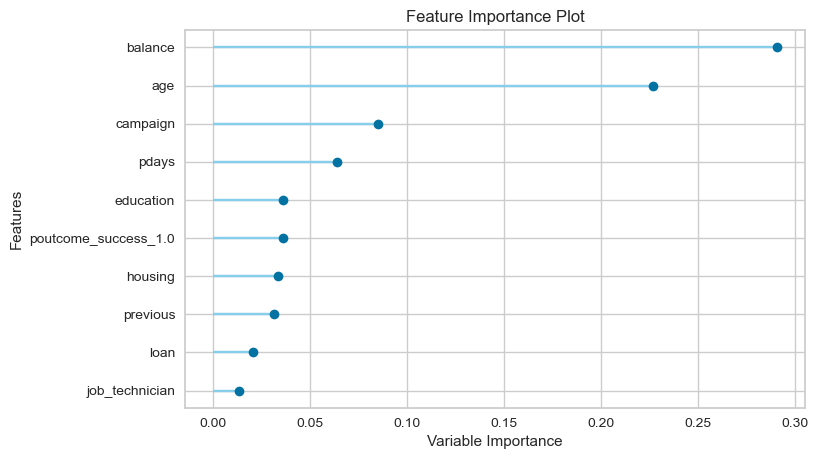

In [40]:
plot_model(rf, plot = 'feature')

    En general el modelo en los datos over con metodo Onehot tiene un mejor resultado que el modelo prerocesado de manera manual.

# Optimizando Hiperparametros
### por F1

In [41]:
tuned_rf = tune_model(rf, n_iter = 50,optimize ='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7141,0.7756,0.5287,0.7449,0.6184,0.4002,0.4152
1,0.7172,0.7906,0.5430,0.7426,0.6273,0.4082,0.4212
2,0.7133,0.7820,0.5125,0.7546,0.6105,0.3964,0.4150
3,0.7219,0.7786,0.5448,0.7525,0.6320,0.4176,0.4317
4,0.7351,0.7978,0.5494,0.7806,0.6449,0.4436,0.4610
5,0.7052,0.7804,0.4758,0.7615,0.5856,0.3752,0.4003
6,0.7186,0.7846,0.5278,0.7558,0.6216,0.4086,0.4253
7,0.7217,0.7899,0.5494,0.7482,0.6335,0.4176,0.4305
8,0.7028,0.7750,0.5117,0.7289,0.6013,0.3758,0.3908
9,0.7303,0.7931,0.5520,0.7681,0.6423,0.4351,0.4504


In [42]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=11, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


# Ensamble

In [ ]:
# # # entrenar un clasificador de ensacado en dt
# bagged_dt = ensemble_model ( rf, method = 'Bagging' )

In [ ]:
# # # entrenar un clasificador adaboost en dt con 100 estimadores
# boosted_dt = ensemble_model ( rf, method = 'Boosting' , n_estimators = 100)

# Modelo en Blender Top3

### F1 por que usamos esta metrica
    Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
    
    Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
    
    F1 combina Precision y Recall en una sola medida
    
    La Matriz de Confusión indica qué tipos de errores se cometen

## Stacker

In [61]:
exp_name = setup(data = df_ov_oh,  target = 'y')
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9740,0.9906,0.9818,0.9604,0.9710,0.9474,0.9476
1,0.9771,0.9950,0.9884,0.9611,0.9746,0.9537,0.9541
2,0.9742,0.9901,0.9808,0.9618,0.9712,0.9478,0.9480
3,0.9701,0.9920,0.9787,0.9551,0.9668,0.9397,0.9399
4,0.9784,0.9950,0.9863,0.9658,0.9760,0.9564,0.9566
5,0.9809,0.9928,0.9858,0.9716,0.9786,0.9614,0.9615
6,0.9717,0.9913,0.9742,0.9625,0.9683,0.9428,0.9428
7,0.9708,0.9891,0.9782,0.9569,0.9675,0.9410,0.9412
8,0.9764,0.9933,0.9853,0.9624,0.9737,0.9524,0.9526
9,0.9706,0.9928,0.9838,0.9515,0.9674,0.9406,0.9410


In [63]:
optimize_threshold(stacker, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.7878000000000001 | Optimized Cost Function: 15009500


0.7878000000000001

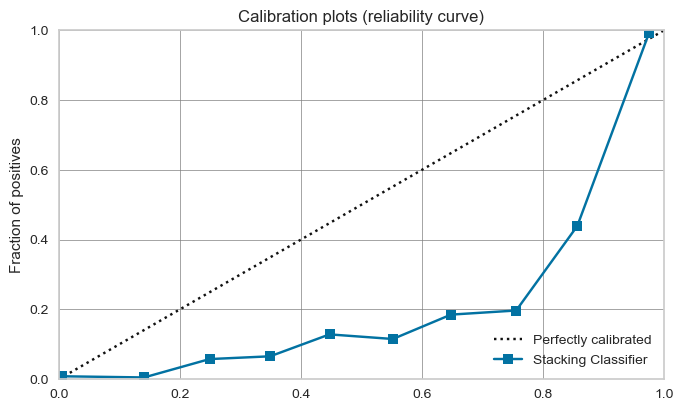

In [64]:
plot_model(stacker, plot = 'calibration')

In [ ]:
#calibrated_dt = calibrate_model (stacker)

# Prediccion

In [ ]:
#predict_model(calibrated_dt);

In [65]:
predict_model(stacker);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9808,0.9948,0.9873,0.9702,0.9787,0.9613,0.9614


In [45]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8433,0.8952,0.8298,0.8208,0.8253,0.6833,0.6833


In [66]:
rf_final = finalize_model(stacker)
#Parámetros finales del modelo Random Forest para su despliegue a producción
print(rf_final)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=8333, shuffle=False),
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
  

    Al utilizar pycaret no es recomendable utilizar el predict luego de finalizar, dado que estariamos intentando predecir los mismo datos que entrenamos.

# Testeando resultados.

    test_trans
    df_over_oh

In [67]:
test_predictions = predict_model(rf_final, data = test_trans)
test_predictions.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_housemaid,marital_single,marital_married,marital_divorced,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Label,Score
0,51,2,0,0.005905,0,0,1,968,2,999,...,0,1,0,0,0.0,0.0,0.0,1.0,0,1.0000
1,56,1,0,0.005006,0,0,0,101,1,999,...,0,0,1,0,0.0,0.0,0.0,1.0,0,1.0000
2,50,2,0,0.000779,0,0,0,22,8,999,...,0,0,1,0,0.0,0.0,0.0,1.0,0,1.0000
3,54,1,0,0.009787,1,0,0,352,1,999,...,0,0,1,0,0.0,0.0,0.0,1.0,0,0.9873
4,47,2,0,0.000000,0,0,0,213,2,999,...,0,0,1,0,0.0,0.0,0.0,1.0,0,1.0000


In [68]:
test_trans.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_unknown,job_student,job_housemaid,marital_single,marital_married,marital_divorced,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,51,2,0,0.005905,0,0,1,968,2,999,...,0,0,0,1,0,0,0.0,0.0,0.0,1.0
1,56,1,0,0.005006,0,0,0,101,1,999,...,0,0,0,0,1,0,0.0,0.0,0.0,1.0
2,50,2,0,0.000779,0,0,0,22,8,999,...,0,0,0,0,1,0,0.0,0.0,0.0,1.0
3,54,1,0,0.009787,1,0,0,352,1,999,...,0,0,0,0,1,0,0.0,0.0,0.0,1.0
4,47,2,0,0.000000,0,0,0,213,2,999,...,0,0,0,0,1,0,0.0,0.0,0.0,1.0


# Resultado

In [69]:
from pycaret.utils import check_metric
check_metric(test_predictions.default, test_predictions.Label, 'Accuracy')

0.9593

In [70]:
from pycaret.utils import check_metric
check_metric(test_predictions.default, test_predictions.Label, 'F1')

0.0

# Guardando datos para carga

In [71]:
test_predictions['Label'].replace([1,0],['yes','no'],inplace=True)

In [72]:
label = test_predictions[['Label']]

In [73]:
label.to_csv('example_ultimo2.csv',index=False , header = False )